

Fait par: Jacob Turcotte

Fait dans le contexte de:

Biog√©nius
&
CCI



# Introduction

Ce document pr√©sente une simulation d'un signal PWM (Modulation de Largeur d'Impulsion) avec une amplitude variant de 0 √† 3,3V. Nous utiliserons les biblioth√®ques SciPy, Matplotlib et NumPy pour r√©aliser cette simulation.

Dans la premi√®re partie, nous allons g√©n√©rer et visualiser le signal PWM. Ensuite, nous simulerons un filtre passe-bas RC pour observer la r√©ponse du syst√®me √† ce signal. Enfin, nous mod√©liserons un circuit RL pour simuler le comportement d'un moteur, mettant en √©vidence l'impact des composants sur le signal PWM.


## Importation des biblioth√®ques

Pour commencer, nous devons importer les biblioth√®ques n√©cessaires pour notre simulation. Les biblioth√®ques utilis√©es dans ce document sont :

- `scipy`: pour g√©n√©rer le signal PWM et effectuer les calculs n√©cessaires.
- `matplotlib.pyplot`: pour visualiser le signal PWM et les r√©sultats des simulations.
- `numpy`: pour manipuler les donn√©es num√©riques.

In [1]:
from scipy import signal
import matplotlib.pyplot as plot
import numpy as np

## Param√®tres et g√©n√©ration du signal PWM

Dans cette section, nous allons d√©finir les param√®tres n√©cessaires pour la g√©n√©ration du signal PWM, puis nous allons cr√©er le signal lui-m√™me.

# Qu'est-ce que le PWM ?

Le **Modulation de Largeur d'Impulsion** (PWM, pour *Pulse Width Modulation*) est une technique de modulation qui consiste √† moduler la largeur des impulsions d'un signal num√©rique afin de contr√¥ler la puissance d√©livr√©e √† une charge. Elle est largement utilis√©e dans divers domaines, notamment dans le contr√¥le des moteurs, l'√©clairage LED, et les alimentations √† d√©coupage.

## Principes de fonctionnement

Le PWM fonctionne en alternant rapidement entre un √©tat haut (ON) et un √©tat bas (OFF). La proportion de temps pendant lequel le signal est √† l'√©tat haut par rapport √† la p√©riode totale du signal d√©termine la **duty cycle** (rapport cyclique) du signal PWM.

### Param√®tres cl√©s

1. **Fr√©quence** : La fr√©quence du signal PWM d√©termine combien de fois par seconde le signal peut basculer entre l'√©tat haut et l'√©tat bas. Par exemple, une fr√©quence de 1 kHz signifie que le signal effectue 1000 cycles par seconde.

2. **Duty Cycle** : Le rapport cyclique est d√©fini comme le rapport du temps o√π le signal est √† l'√©tat haut par rapport √† la p√©riode totale du signal. Il est g√©n√©ralement exprim√© en pourcentage. Par exemple, un duty cycle de 50% signifie que le signal est √† l'√©tat haut pendant la moiti√© de la p√©riode et √† l'√©tat bas pendant l'autre moiti√©.

   **Formule** :
   Duty Cycle = (Temps en haut / Temps total) √ó 100
   o√π "Temps en haut" est le temps pendant lequel le signal est √† l'√©tat haut et "Temps total" est la p√©riode totale du signal.

## Applications du PWM

1. **Contr√¥le de la vitesse des moteurs** : En ajustant le duty cycle d'un signal PWM, on peut contr√¥ler la vitesse d'un moteur √† courant continu. Un duty cycle plus √©lev√© augmente la puissance moyenne fournie au moteur, ce qui augmente sa vitesse.

2. **Dimming des LED** : Le PWM permet de contr√¥ler la luminosit√© des LED. En variant le duty cycle, on peut simuler diff√©rentes intensit√©s lumineuses.

3. **Alimentations √† d√©coupage** : Dans les circuits d'alimentation, le PWM est utilis√© pour r√©guler la tension de sortie en contr√¥lant la dur√©e des impulsions.

## Avantages du PWM

- **Efficacit√© √©nerg√©tique** : Le PWM est une m√©thode tr√®s efficace pour contr√¥ler la puissance car il minimise les pertes d'√©nergie, contrairement aux m√©thodes analogiques comme la r√©sistance variable.
- **Pr√©cision** : Permet un contr√¥le pr√©cis de la puissance et de la vitesse, rendant les syst√®mes plus r√©actifs.
- **Facilit√© de mise en ≈ìuvre** : Les circuits PWM sont simples √† concevoir et √† mettre en ≈ìuvre dans des applications √©lectroniques.


### Param√®tres de l'example

- **fr√©quence** : 10 000 Hz (fr√©quence de l'onde carr√©e)
- **rapport cyclique PWM** : 0,5 (0,0 √† 1,0)
- **source** : 3,3 V (amplitude maximale du signal)

### Code

In [2]:
# Parameters
frequency = 10000 # Frequency of the square wave (in Hz)
pwm_duty_cycle = 0.5  # Duty cycle for PWM (0.0 to 1.0)
source = 3.3  # Max amplitude of the signal

# Time array
t = np.linspace(0, 0.01, 50000, endpoint=True)

# Generate square wave with specified frequency and duty cycle
f_PWM = (source / 2) * signal.square(2 * np.pi * frequency * t, duty=pwm_duty_cycle) + (source / 2)
f_mean = np.mean(f_PWM)



## Affichage du signal PWM

Dans cette section, nous allons visualiser le signal PWM g√©n√©r√©. Nous allons d√©finir la taille de la figure, les √©tiquettes des axes, et afficher le signal avec une ligne repr√©sentant la moyenne.

### Code

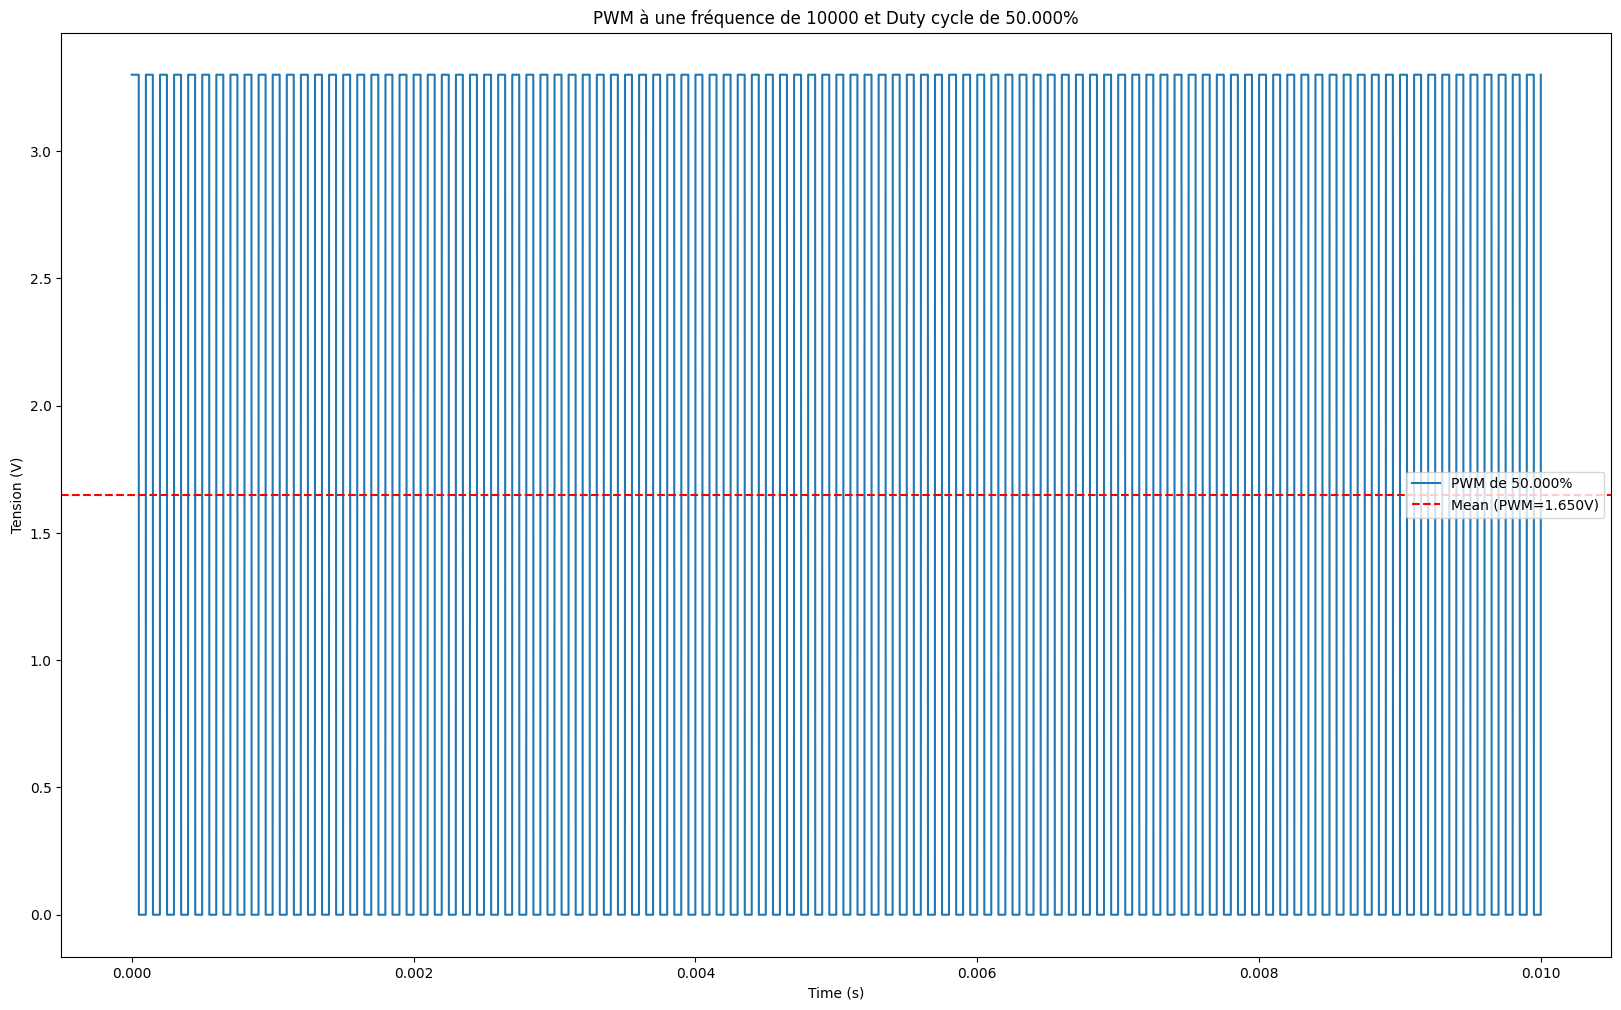

In [3]:
# Display 
# Set figure size (width, height in inches)
plot.figure(figsize=(20, 12))
# Give x,y, title axis label
plot.xlabel('Time (s)')
plot.ylabel('Tension (V)')
plot.title(f'PWM √† une fr√©quence de {frequency} et Duty cycle de {pwm_duty_cycle*100:.3f}%')

# Plot the square wave
plot.plot(t, f_PWM, label=f'PWM de {pwm_duty_cycle*100:.3f}%')
# Plot the mean as a horizontal line
plot.axhline(y=f_mean, color='r', linestyle='--', label=f'Mean (PWM={f_mean:.3f}V)')

# Add legend
plot.legend()


plot.show()

# Param√®tres du filtre passe-bas (circuit RC) et simulation de la r√©ponse

Dans cette section, nous allons d√©finir les param√®tres n√©cessaires pour le filtre passe-bas RC et simuler la r√©ponse du circuit √† l'entr√©e du signal PWM.

### Param√®tres

- **R** : 1 kŒ© (r√©sistance)
- **C** : 1 ¬µF (capacitance)
- **tau** : constante de temps ($\tau$ = RC)
La constante de temps œÑ d√©termine la rapidit√© avec laquelle la tension dans le condensateur change par rapport au courant appliqu√©.

### Les formules
- **Xc** : R√©actance capacitive (Œ©) $$ X_{c} = \frac{1}{2\pi fC}$$
    - Cette √©quation donne la r√©actance du condensateur, qui est l'√©quivalent de la r√©sistance d'un condensateur dans le domaine de la fr√©quence. Elle diminue √† mesure que la fr√©quence augmente, ce qui signifie que le condensateur laisse mieux passer les signaux √† haute fr√©quence.

- **fc** : Fr√©quence de coupure (Hz) $$ fc = \frac{1}{2\pi RC} $$
    - La fr√©quence de coupure est le point o√π le signal est att√©nu√© de 3 dB. En dessous de cette fr√©quence, le filtre passe-bas laisse passer la majeure partie du signal, tandis qu'au-dessus, il att√©nue le signal.

- **gain** : Gain du filtre RC (dB) $$ gain = 20 \log{10}(\frac{V_{in}}{V_{out}} )$$
    - Le gain mesure l'att√©nuation du signal √† la sortie par rapport √† l'entr√©e en termes de d√©cibels. Un gain n√©gatif signifie une att√©nuation, ce qui est attendu dans un filtre passe-bas √† des fr√©quences au-del√† de la fr√©quence de coupure.

- **√âquation diff√©rentiel** : $$\frac{dV_{out}}{dt} = \frac{V_{in} - V_{out}}{\tau}$$
    - Cette √©quation d√©crit la variation temporelle de la tension de sortie ùëâùëúùë¢ùë° par rapport √† la tension d'entr√©e ùëâùëñùëõ. Elle capture le comportement du condensateur qui se charge ou se d√©charge, d√©pendant de la diff√©rence entre ùëâùëñùëõ et ùëâùëúùë¢ùë°, et de la constante de temps œÑ.

- **Int√©gration avec la m√©thode de Euler** : $$V_{out}[i] = V_{out}[i-1] + \left(\frac{dV_{out}}{dt}\right) \cdot dt$$
    - L'int√©gration num√©rique par la m√©thode d'Euler permet de simuler la r√©ponse du circuit RC au fil du temps. Cette m√©thode approche la solution de l'√©quation diff√©rentielle en ajoutant un petit incr√©ment ùëëùë° √† chaque pas de temps, pour obtenir la tension de sortie suivante.


In [4]:
# Parameters for low-pass filter (RC circuit)
R = 1e3  # Resistance in ohms (e.g., 1k ohm)
C = 1e-6  # Capacitance in farads (e.g., 1uF)
tau = R * C  # Time constant (tau = RC)

Xc = 1/(2*np.pi*frequency*C)
Vout_one_tick = source * (Xc/np.sqrt((R*R)+(Xc*Xc)))

fc = 1/(2*np.pi*tau)
gain = 20*np.log10(source/Vout_one_tick)

dt = t[1] - t[0]  # Time step (based on the time array)
Vout = np.zeros_like(f_PWM)  # Initialize Vout array

# Simulate RC circuit response using Euler's method
for i in range(1, len(t)):
    dVout_dt = (f_PWM[i] - Vout[i-1]) / tau  # Differential equation
    Vout[i] = Vout[i-1] + dVout_dt * dt  # Euler integration


## Affichage du signal d'entr√©e et de sortie

Dans cette section, nous allons afficher √† la fois le signal PWM d'entr√©e et le signal de sortie filtr√© par le circuit RC. Nous allons √©galement indiquer les valeurs de la constante de temps œÑ ainsi que les moyennes des signaux.

Valeur Vout pour le premier tick: 0.0525
Valeur Tau du syst√®me: 0.001
Fr√©quence de coupure: 159.15Hz
Gain du circuit RC: -35.96dB ou bien 1.59%


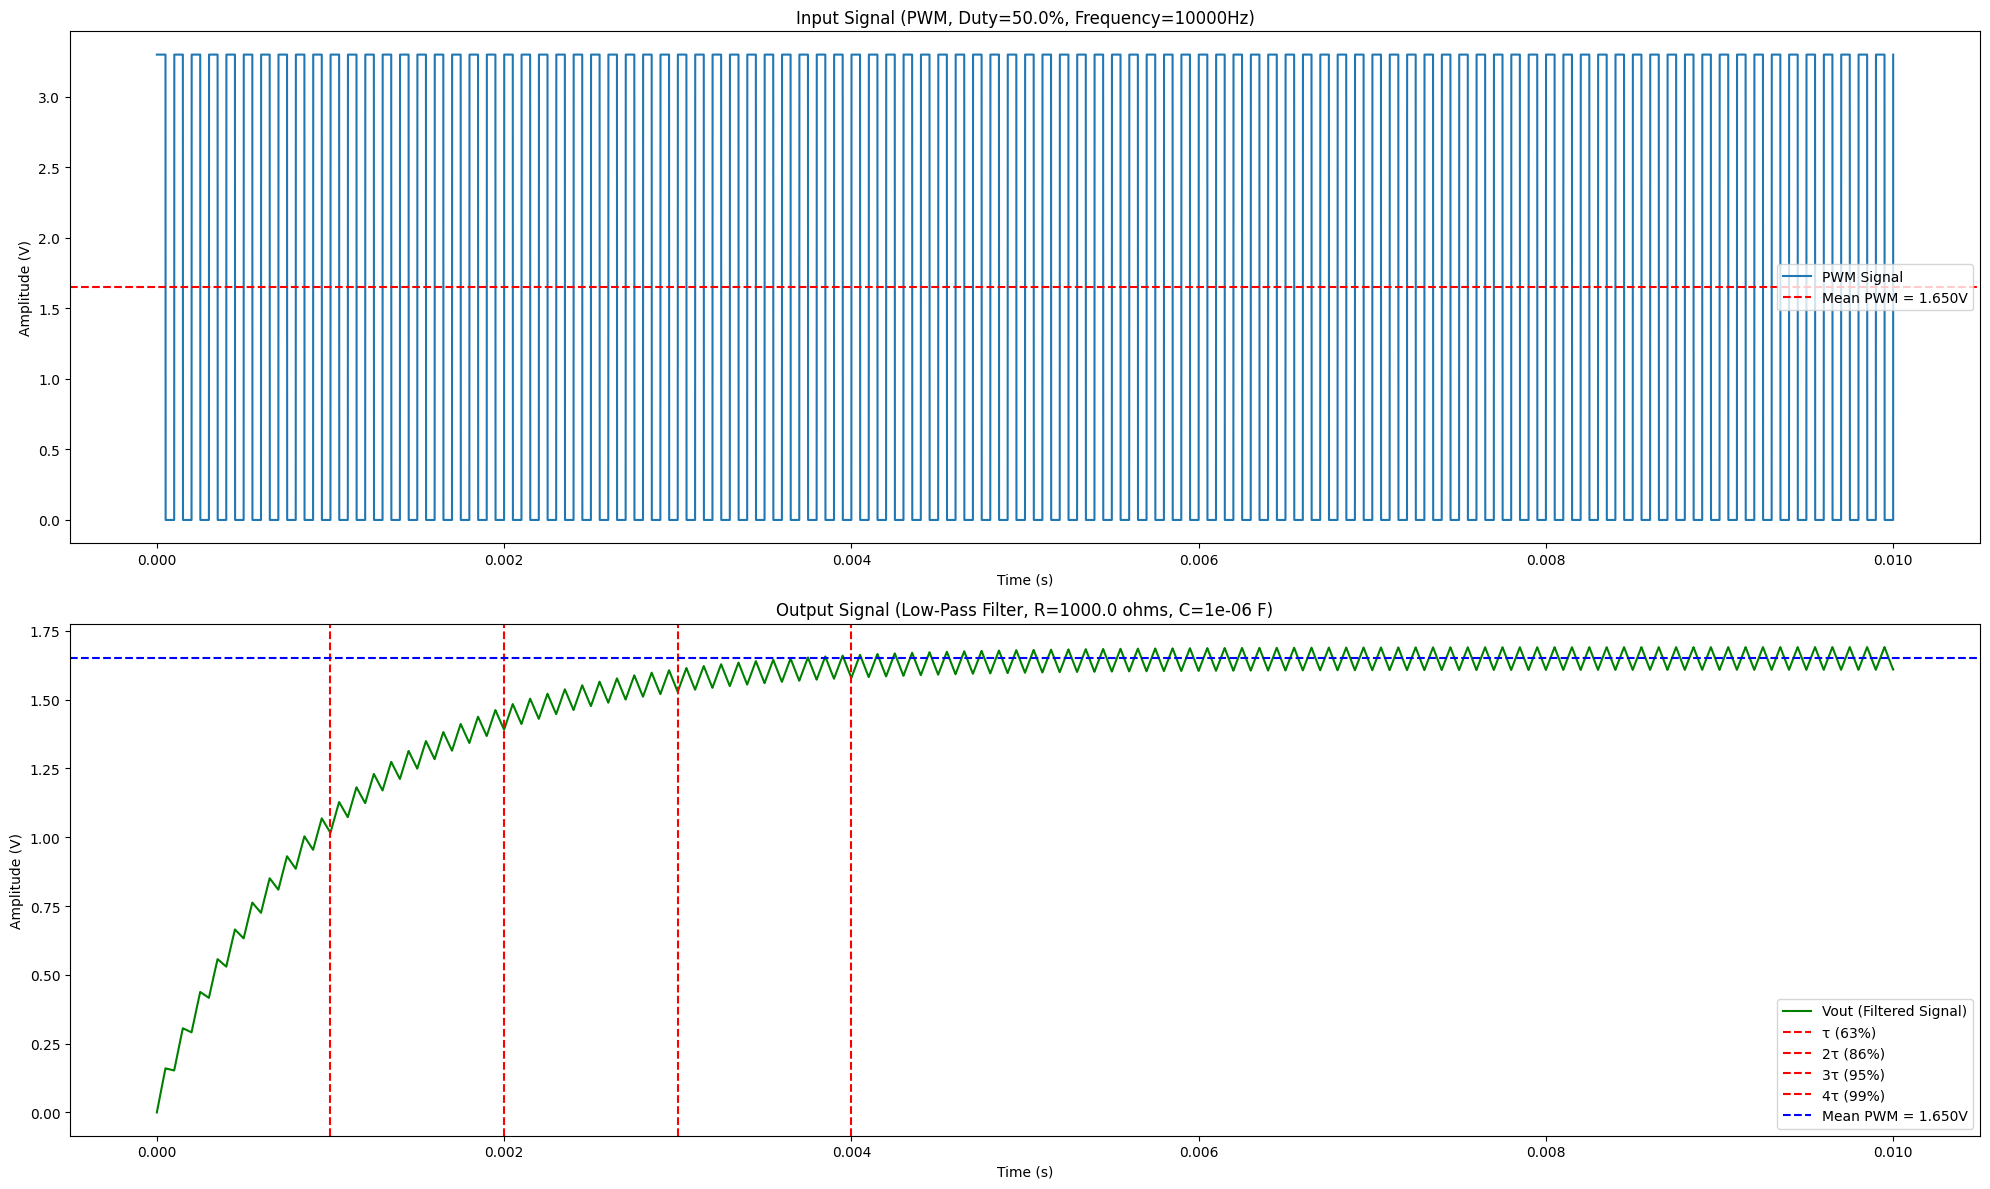

In [5]:
print("Valeur Vout pour le premier tick: "+'{:.4f}'.format(Vout_one_tick))
print(f"Valeur Tau du syst√®me: {tau}")
print(f"Fr√©quence de coupure: {fc:.2f}Hz")
print(f"Gain du circuit RC: -{gain:.2f}dB ou bien {(Vout_one_tick/source)*100:.2f}%")
# Plotting the input (PWM) and output (filtered signal) on separate graphs
plot.figure(figsize=(20, 12))

# Plot PWM (Vin)
plot.subplot(2, 1, 1)
plot.plot(t, f_PWM, label='PWM Signal')
plot.axhline(y=np.mean(f_PWM), color='r', linestyle='--', label=f'Mean PWM = {np.mean(f_PWM):.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Input Signal (PWM, Duty={pwm_duty_cycle*100:.1f}%, Frequency={frequency}Hz)')
plot.legend()

# Plot filtered output (Vout)
plot.subplot(2, 1, 2)
plot.plot(t, Vout, label='Vout (Filtered Signal)', color='g')
plot.axvline(x= tau, ymin=0, ymax=3.3, color='r',  linestyle='--', label='œÑ (63%)')
plot.axvline(x= tau*2, ymin=0, ymax=3.3, color='r',  linestyle='--', label='2œÑ (86%)')
plot.axvline(x= tau*3, ymin=0, ymax=3.3, color='r',  linestyle='--', label='3œÑ (95%)')
plot.axvline(x= tau*4, ymin=0, ymax=3.3, color='r',  linestyle='--', label='4œÑ (99%)')
plot.axhline(y=np.mean(f_PWM), color='b', linestyle='--', label=f'Mean PWM = {np.mean(f_PWM):.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Output Signal (Low-Pass Filter, R={R} ohms, C={C} F)')
plot.legend()

plot.tight_layout()
plot.show()

# Bounce d'un bouton √©lectrique

Le **bounce** d'un bouton √©lectrique d√©signe les rebonds ou oscillations qui surviennent lors de l'appui ou du rel√¢chement du bouton. Lorsque les contacts m√©talliques internes d'un bouton se touchent ou se s√©parent, ils ne forment pas un contact imm√©diat et stable. √Ä la place, ils rebondissent plusieurs fois en quelques millisecondes avant de se stabiliser, g√©n√©rant ainsi plusieurs transitions rapides entre l'√©tat haut et l'√©tat bas. Ce ph√©nom√®ne est probl√©matique dans les circuits num√©riques ou les syst√®mes de microcontr√¥leurs, car ces transitions parasites peuvent √™tre interpr√©t√©es comme plusieurs appuis ou rel√¢chements successifs du bouton, entra√Ænant des comportements ind√©sirables. Pour √©viter ces effets, des techniques de **debouncing** (logiciel ou mat√©riel) sont souvent utilis√©es afin de filtrer ou de stabiliser le signal.


In [6]:
# Parameters for the simulation
duration_bounce = 0.05  # Duration of the button press in seconds
sampling_rate_bounce = 10000  # Samples per second
t_bounce = np.linspace(0, duration_bounce, int(duration_bounce * sampling_rate_bounce))

# Simulate a clean button press (0 to 3.3V transition)
clean_press = np.full_like(t_bounce, 3.3)
clean_press[t_bounce < 0.005] = 0  # Before 5ms, the button is not pressed

# Simulate bouncing by adding noise around the transition time
bounce_time_start = 0.005  # Start of bouncing
bounce_time_end = 0.015  # End of bouncing (after stabilizing)
bounce_indices = (t_bounce >= bounce_time_start) & (t_bounce <= bounce_time_end)

# Random bouncing between 0 and 1 during the bounce period
np.random.seed(0)  # For reproducibility
bouncing = np.random.choice([0, 3.3], size=np.sum(bounce_indices))

# Create the final signal by combining the clean press with the bouncing part
button_signal = clean_press.copy()
button_signal[bounce_indices] = bouncing



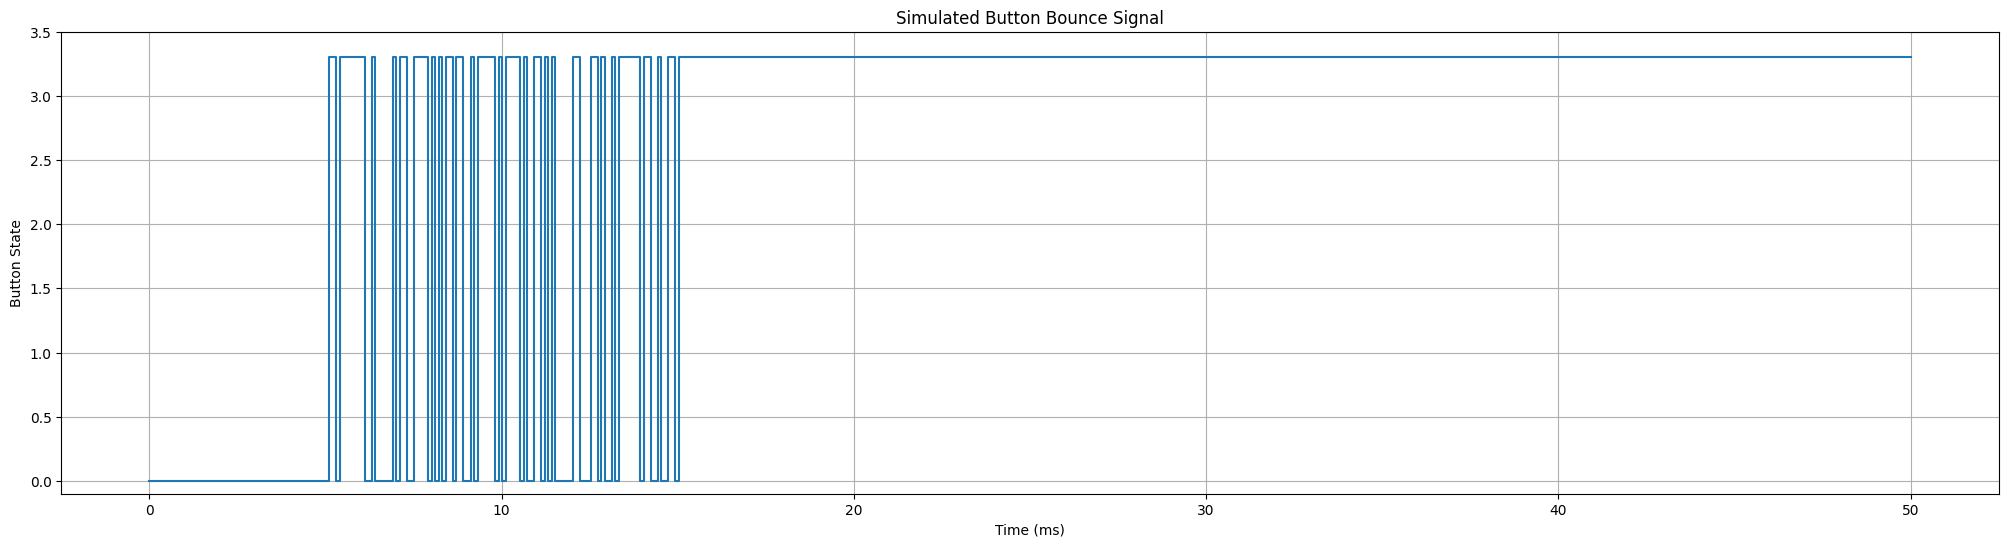

In [7]:
# Plot the signal
plot.figure(figsize=(25, 6))
plot.plot(t_bounce * 1000, button_signal, drawstyle='steps-post')  # Time in ms
plot.title('Simulated Button Bounce Signal')
plot.xlabel('Time (ms)')
plot.ylabel('Button State')
plot.grid(True)
plot.ylim([-0.1, 3.5])
plot.show()


### Debounce mat√©riel (analogique)

Un **debounce mat√©riel** consiste √† utiliser un circuit analogique pour √©liminer les rebonds d'un bouton √©lectrique avant que le signal n'atteigne le circuit num√©rique. Une m√©thode courante pour cela est l'utilisation d'un **filtre RC** (r√©sistance-capacit√©). Ce filtre agit comme un passe-bas, en lissant les transitions rapides du signal provenant du bouton. Lorsqu'un bouton est press√©, le condensateur du circuit se charge lentement en fonction de la constante de temps du r√©seau RC (d√©termin√©e par la r√©sistance et la capacit√©). Ce processus emp√™che les variations rapides (caus√©es par les rebonds) d'affecter directement le signal final. Une fois que le condensateur est charg√© ou d√©charg√©, le signal est stabilis√©, ce qui √©limine efficacement les oscillations ind√©sirables. Ce signal est ensuite souvent trait√© par un **comparateur de tension** ou un **trigger de Schmitt** pour garantir une transition nette et fiable entre l'√©tat haut et l'√©tat bas.


In [8]:
# Parameters for low-pass filter (RC circuit)
R = 4.7e3  # Resistance in ohms (e.g., 10k ohm)
C = 1e-6  # Capacitance in farads (e.g., 0.1uF)
tau = R*C

dt = t_bounce[1] - t_bounce[0]  # Time step (based on the time array)
Vout = np.zeros_like(button_signal)  # Initialize Vout array

# Simulate RC circuit response using Euler's method
for i in range(1, len(t_bounce)):
    dVout_dt = (button_signal[i] - Vout[i-1]) / tau  # Differential equation
    Vout[i] = Vout[i-1] + dVout_dt * dt  # Euler integration

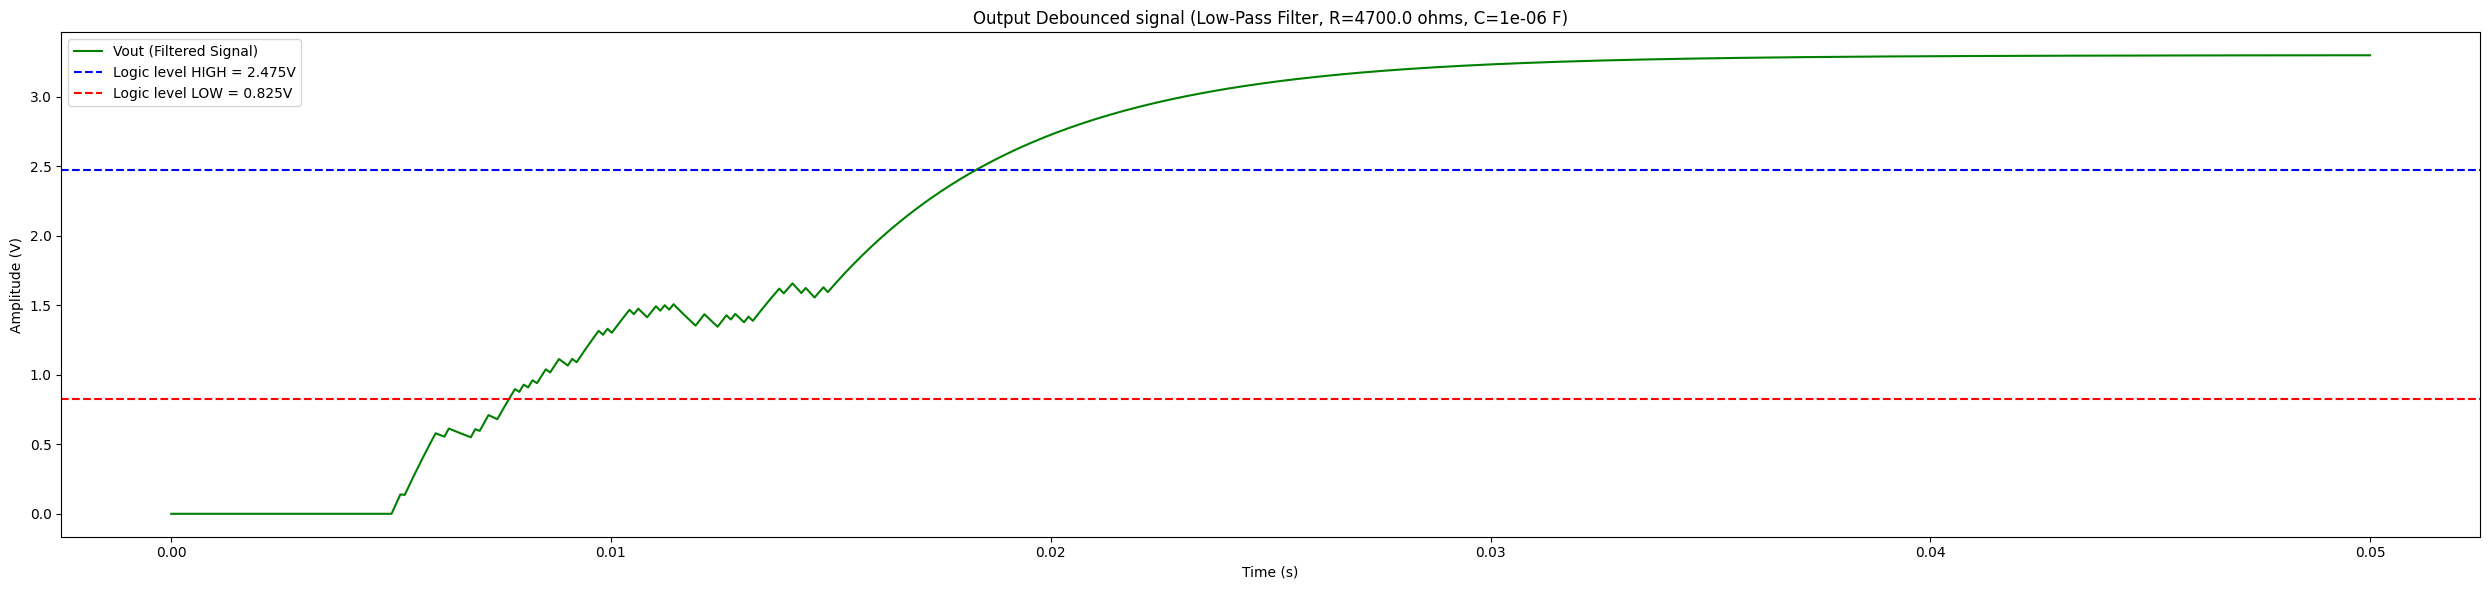

In [9]:
plot.figure(figsize=(25, 6))
plot.plot(t_bounce, Vout, label='Vout (Filtered Signal)', color='g')

plot.axhline(y=source*0.75, color='b', linestyle='--', label=f'Logic level HIGH = {source*0.75:.3f}V')
plot.axhline(y=source*0.25, color='r', linestyle='--', label=f'Logic level LOW = {source*0.25:.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Output Debounced signal (Low-Pass Filter, R={R} ohms, C={C} F)')
plot.legend()

plot.tight_layout()
plot.show()

### Debounce logiciel

Le **debounce logiciel** est une m√©thode qui consiste √† traiter les rebonds d'un bouton √©lectrique au niveau du code, en filtrant les transitions rapides ind√©sirables. Cela se fait en introduisant une temporisation apr√®s la d√©tection d'une transition du signal (appui ou rel√¢chement du bouton). Lorsqu'une transition est d√©tect√©e, le syst√®me ignore les changements suppl√©mentaires du signal pendant une dur√©e d√©termin√©e (g√©n√©ralement quelques millisecondes), le temps que les rebonds cessent. Il existe plusieurs approches pour impl√©menter un debounce logiciel, notamment :

- **Temporisation fixe** : apr√®s chaque changement d'√©tat du bouton, un d√©lai est ajout√© pour ignorer toute autre transition avant la fin de ce d√©lai.
- **Comptage stable** : le syst√®me surveille le bouton sur plusieurs cycles, et l'√©tat n'est consid√©r√© comme stable que lorsque la m√™me valeur est d√©tect√©e plusieurs fois cons√©cutives.
  
Le debounce logiciel est flexible et peut √™tre ajust√© en fonction des caract√©ristiques du bouton et des exigences de l'application, mais il n√©cessite g√©n√©ralement l'utilisation de temporisations (avec des timers ou des boucles d'attente) pour fonctionner efficacement.


# **CONTENU EXTRA NON N√âCESSAIRE √Ä L'EXERCICE**
## Param√®tres du circuit RL et simulation de la r√©ponse

Dans cette section, nous allons d√©finir les param√®tres n√©cessaires pour le circuit RL et simuler la r√©ponse du circuit √† l'entr√©e du signal PWM.

### Param√®tres

- **R** : 100 Œ© (r√©sistance)
- **L** : 0,1 H (inductance)
- **$\tau$** : constante de temps (œÑ = L/R)

La constante de temps œÑ d√©termine la rapidit√© avec laquelle le courant dans l'inducteur change par rapport √† la tension appliqu√©e.

### Les Formules

- **V_L** : Tension aux bornes de l'inductance (V) $$ V_L = L \frac{dI}{dt} $$
  - Cette √©quation d√©crit la relation entre la tension aux bornes de l'inductance V_L et le taux de changement du courant I dans le circuit. Une augmentation rapide du courant entra√Æne une tension plus √©lev√©e √† travers l'inductance, tandis qu'une diminution rapide produit une tension n√©gative.

- **œÑ** : Constante de temps (s) $$ \tau = \frac{L}{R} $$
  - La constante de temps œÑ indique combien de temps il faut au circuit pour atteindre environ 63,2 % de sa valeur finale apr√®s une variation de la tension d'entr√©e. Une œÑ plus grande signifie une r√©ponse plus lente du circuit √† des changements dans le signal d'entr√©e.

- **√âquation diff√©rentielle** : $$ \frac{dI_{out}}{dt} = \frac{V_{in} - RI_{out}}{L} $$
  - Cette √©quation d√©crit la variation temporelle du courant de sortie I_{out} en fonction de la tension d'entr√©e V_{in} et de la r√©sistance R. Elle illustre comment le courant change en fonction de la diff√©rence entre la tension d'entr√©e et la tension due √† la chute de tension sur la r√©sistance.

- **Int√©gration avec la m√©thode d'Euler** :  $$ I_{out}[i] = I_{out}[i-1] + \left(\frac{dI_{out}}{dt}\right) \cdot dt $$
  - L'int√©gration num√©rique par la m√©thode d'Euler permet de simuler la r√©ponse du circuit RL au fil du temps. Cette m√©thode calcule la valeur du courant de sortie pour chaque pas de temps dt en ajoutant le produit de la d√©riv√©e dI_{out}/dt et du pas de temps √† la valeur pr√©c√©dente du courant.

### Code

In [10]:
# Parameters for the RL circuit
R = 100  # Resistance in ohms
L = 0.1  # Inductance in henries
tau = L / R  # Time constant (L/R)
dt = t[1] - t[0]  # Time step (based on the time array)
Iout = np.zeros_like(f_PWM)  # Initialize Iout (current) array

# Simulate RL circuit response using Euler's method
for i in range(1, len(t)):
    dIout_dt = (f_PWM[i] - R * Iout[i-1]) / L  # Differential equation for RL circuit
    Iout[i] = Iout[i-1] + dIout_dt * dt  # Euler integration

## Affichage du signal d'entr√©e et de courant dans le circuit RL

Dans cette section, nous allons afficher √† la fois le signal PWM d'entr√©e et le courant de sortie √† travers l'inducteur dans le circuit RL. Nous allons √©galement indiquer les valeurs de la constante de temps œÑ ainsi que les moyennes des signaux.


Valeur Tau du syst√®me: 0.001


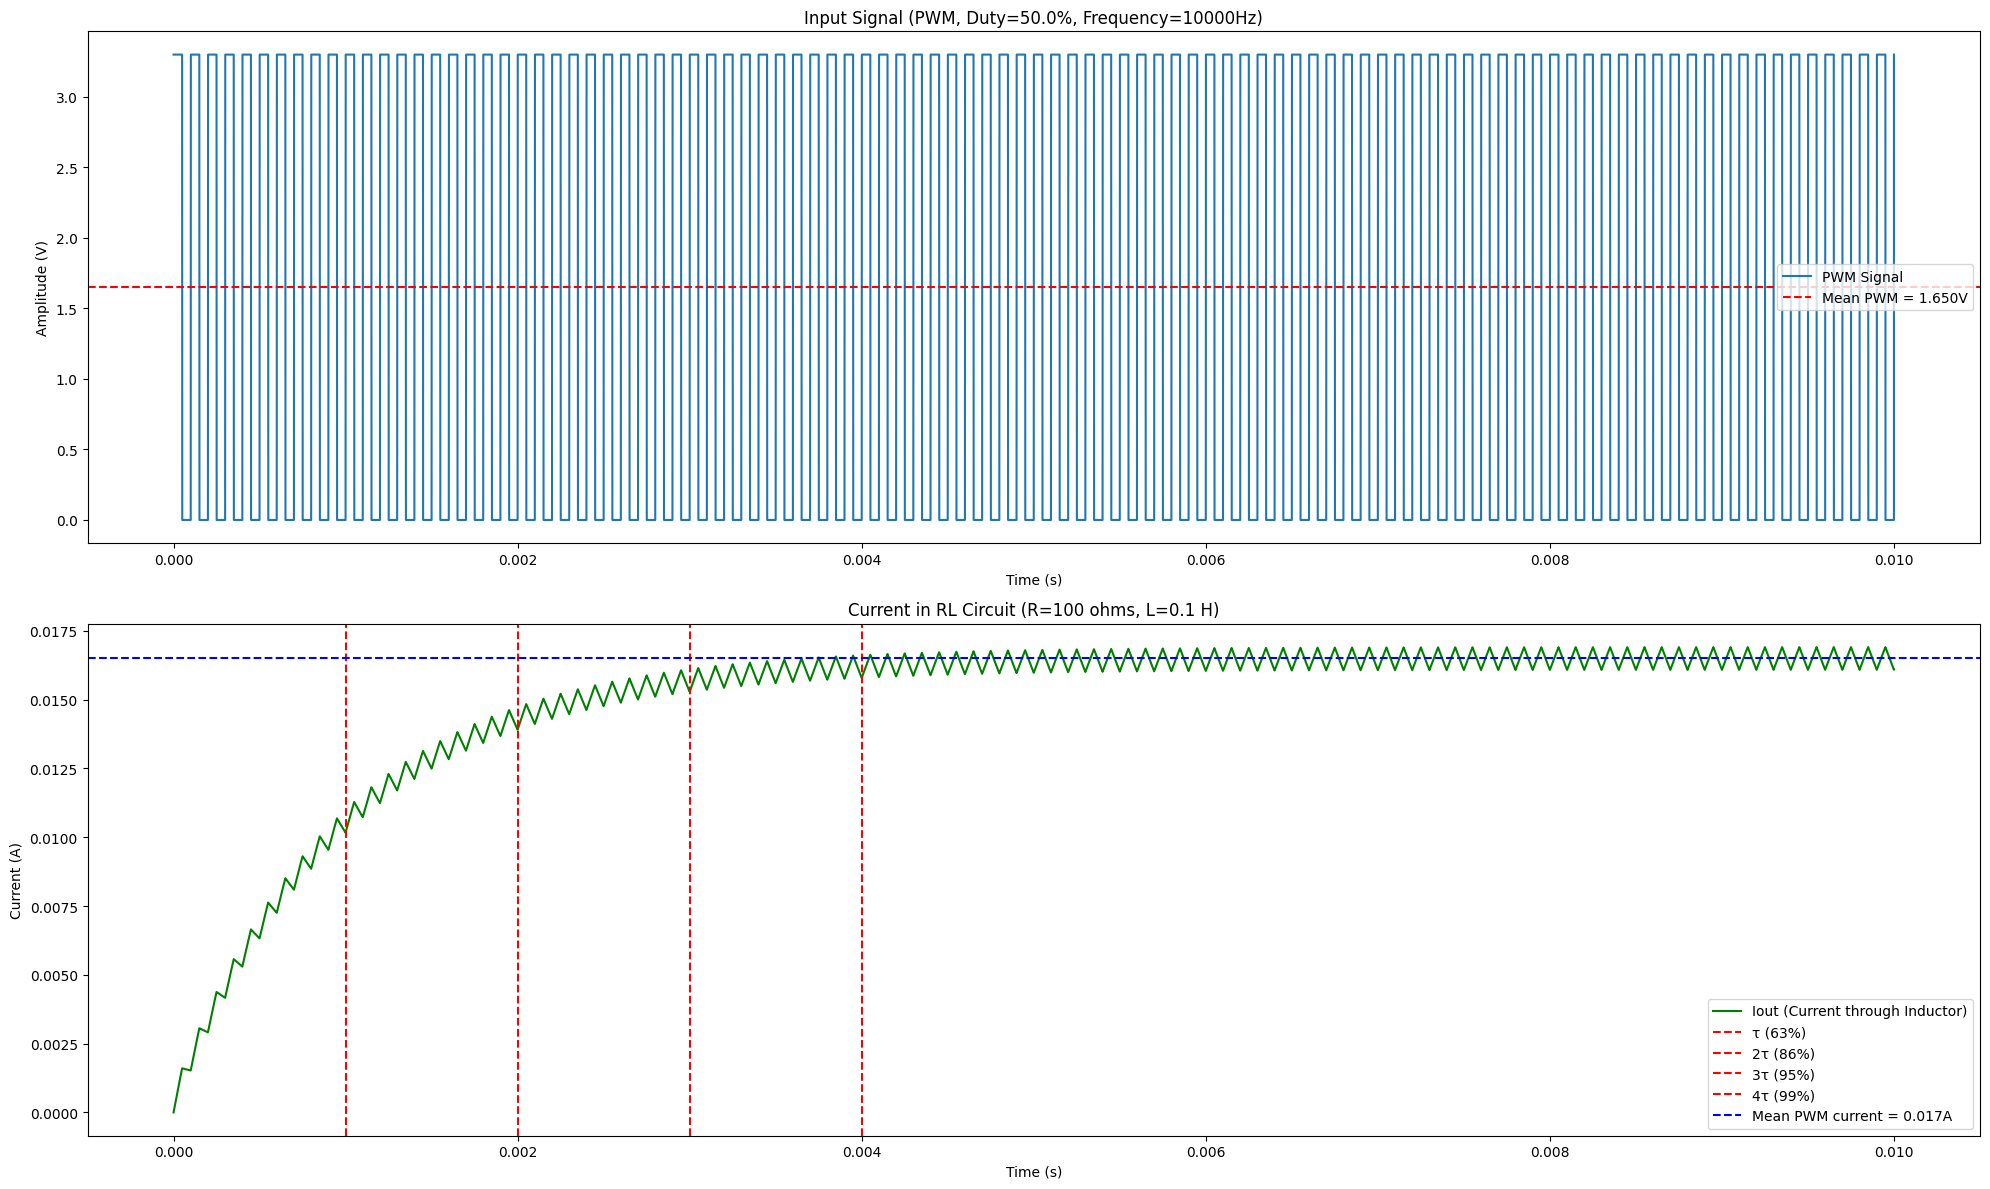

In [11]:
print(f"Valeur Tau du syst√®me: {tau}")
# Plotting the input (PWM) and output (filtered signal) on separate graphs
plot.figure(figsize=(20, 12))

# Plot PWM (Vin)
plot.subplot(2, 1, 1)
plot.plot(t, f_PWM, label='PWM Signal')
plot.axhline(y=np.mean(f_PWM), color='r', linestyle='--', label=f'Mean PWM = {np.mean(f_PWM):.3f}V')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Input Signal (PWM, Duty={pwm_duty_cycle*100:.1f}%, Frequency={frequency}Hz)')
plot.legend()

# Plot filtered output (Vout)
plot.subplot(2, 1, 2)
plot.plot(t, Iout, label='Iout (Current through Inductor)', color='g')
plot.axvline(x= tau, ymin=0, ymax=3.3, color='r',  linestyle='--', label='œÑ (63%)')
plot.axvline(x= tau*2, ymin=0, ymax=3.3, color='r',  linestyle='--', label='2œÑ (86%)')
plot.axvline(x= tau*3, ymin=0, ymax=3.3, color='r',  linestyle='--', label='3œÑ (95%)')
plot.axvline(x= tau*4, ymin=0, ymax=3.3, color='r',  linestyle='--', label='4œÑ (99%)')
plot.axhline(y=np.mean(f_PWM/R), color='b', linestyle='--', label=f'Mean PWM current = {np.mean(f_PWM/R):.3f}A')
plot.xlabel('Time (s)')
plot.ylabel('Current (A)')
plot.title(f'Current in RL Circuit (R={R} ohms, L={L} H)')
plot.legend()

plot.tight_layout()
plot.show()

SIN WAVE WITH PWM

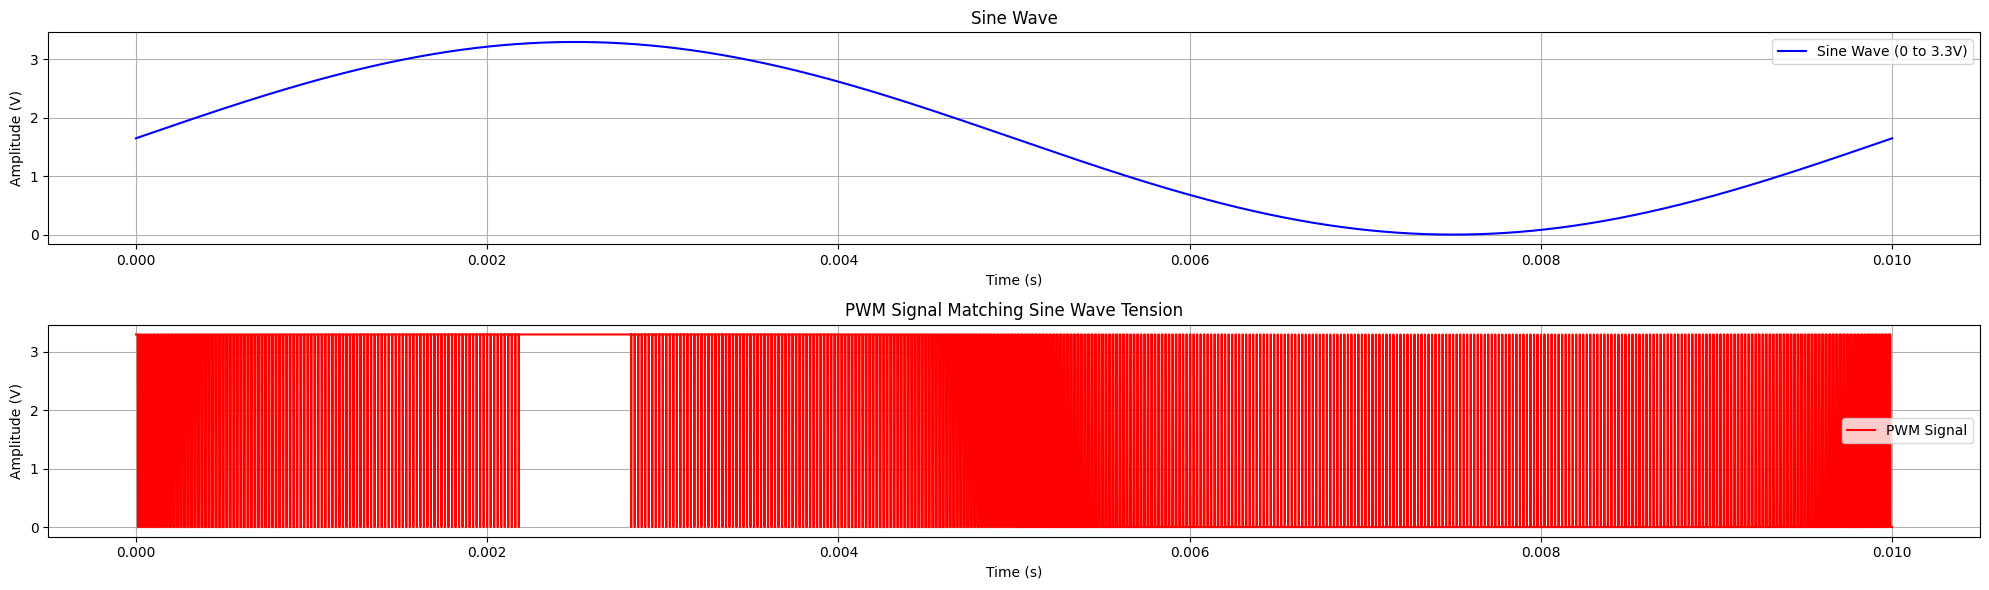

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
frequency = 100  # Frequency of the square wave (in Hz)
pwm_frequency = 500  # Frequency of the PWM signal (in Hz)
source = 3.3  # Max amplitude of the signal
sampling_rate = 50000  # Sampling rate in Hz

# Time array
t = np.linspace(0, 0.01, sampling_rate, endpoint=True)

# Generate sine wave
sig = (source / 2) * (np.sin(2 * np.pi * frequency * t) + 1)  # Normalize sine wave to [0, source]

# Calculate PWM duty cycle based on sine wave values
pwm_duty_cycle = sig / source  # Duty cycle normalized to [0, 1]

# Generate PWM signal
pwm_signal = np.zeros_like(t)

# Create the PWM signal
for i in range(len(t)):
    if i % (sampling_rate // pwm_frequency) < (sampling_rate // pwm_frequency) * pwm_duty_cycle[i]:
        pwm_signal[i] = source  # Set to source voltage for high
    else:
        pwm_signal[i] = 0  # Set to 0 for low

# Plotting
plt.figure(figsize=(20, 6))

# Plot sine wave
plt.subplot(2, 1, 1)
plt.plot(t, sig, label='Sine Wave (0 to 3.3V)', color='blue')
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid()
plt.legend()

# Plot PWM signal
plt.subplot(2, 1, 2)
plt.plot(t, pwm_signal, label='PWM Signal', color='red')
plt.title('PWM Signal Matching Sine Wave Tension')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Utilisation d'un circuit RC passe-bas pour g√©n√©rer un signal sinuso√Ødal √† partir d'un signal PWM

## Introduction

Un circuit RC passe-bas peut √™tre utilis√© pour lisser un signal **PWM** (Pulse Width Modulation) afin de produire un signal analogue proche d'une sinuso√Øde. Cette technique est souvent employ√©e pour g√©n√©rer des formes d'onde sinuso√Ødales lorsque seules des signaux num√©riques (tels que PWM) sont disponibles.

### Sch√©ma du montage

Le sch√©ma d'un simple filtre RC passe-bas est compos√© d'une r√©sistance \( R \) et d'un condensateur \( C \) connect√©s en s√©rie. Le signal PWM est appliqu√© √† l'entr√©e du filtre, et le signal liss√© est r√©cup√©r√© en sortie du condensateur.

$$
f_c = \frac{1}{2 \pi RC}
$$

o√π :
- f_c est la fr√©quence de coupure du filtre,
- R est la r√©sistance,
- C est la capacit√©.

### Fonctionnement

Le signal PWM est un signal carr√©, o√π le rapport cyclique (le rapport entre la dur√©e de l'√©tat haut et la p√©riode totale) est modul√© pour approcher une sinuso√Øde. Le filtre RC passe-bas permet d'att√©nuer les harmoniques hautes fr√©quences du signal PWM, ne laissant passer que les composantes basses fr√©quences, qui peuvent approcher une forme sinuso√Ødale si le PWM est suffisamment rapide et bien modul√©.

### G√©n√©ration d'un signal sinuso√Ødal

1. **Modulation du PWM** : Pour g√©n√©rer un signal sinuso√Ødal, il est possible de moduler le rapport cyclique du signal PWM en fonction de la fonction sinuso√Ødale d√©sir√©e. Par exemple, le rapport cyclique pourrait √™tre calcul√© √† chaque p√©riode de PWM selon la formule suivante :

   $$
   Duty\_Cycle(t) = \frac{V_{max}}{2} \left(1 + \sin(2\pi f t)\right)
   $$

   o√π :
   - V_max est l'amplitude maximale du signal PWM,
   - f est la fr√©quence du signal sinuso√Ødal souhait√©,
   - t est le temps.

2. **Filtrage du signal** : Une fois le signal PWM g√©n√©r√©, le filtre RC passe-bas att√©nue les composantes haute fr√©quence du signal carr√© et laisse passer les basses fr√©quences, produisant ainsi un signal liss√© qui s'approche d'une sinuso√Øde.

## D√©savantages

### 1. **Fr√©quence de coupure**

La fr√©quence de coupure \( f_c \) du filtre RC d√©termine quelles fr√©quences sont att√©nu√©es. Elle doit √™tre choisie de fa√ßon √† filtrer efficacement les harmoniques ind√©sirables du signal PWM tout en laissant passer la fr√©quence fondamentale de la sinuso√Øde. Si la fr√©quence de coupure est trop basse, le signal peut √™tre trop att√©nu√© et d√©form√©. Si elle est trop √©lev√©e, le signal PWM ne sera pas suffisamment liss√©.

### 2. **D√©calage de phase**

Le filtre RC introduit un d√©calage de phase, en particulier pr√®s de la fr√©quence de coupure. Ce d√©calage de phase peut provoquer un retard entre le signal PWM d'entr√©e et le signal sinuso√Ødal de sortie, d√©gradant la pr√©cision du signal g√©n√©r√©. Le d√©calage de phase est donn√© par :

$$
\phi(f) = -\tan^{-1}(2 \pi f RC)
$$

o√π phi est l'angle de phase en fonction de la fr√©quence f.

### 3. **Amplitude non id√©ale**

La sortie du filtre RC ne reproduit pas parfaitement l'amplitude de la sinuso√Øde souhait√©e. Plus la fr√©quence du signal sinuso√Ødal approche de la fr√©quence de coupure, plus l'amplitude est att√©nu√©e. Il est donc n√©cessaire de compenser cette att√©nuation pour obtenir une forme d'onde d'amplitude correcte.

### 4. **Limites en haute fr√©quence**

Pour des signaux sinuso√Ødaux √† haute fr√©quence, le filtre RC peut ne pas √™tre assez performant pour lisser efficacement le signal PWM, surtout si la fr√©quence du PWM n'est pas suffisamment sup√©rieure √† celle du signal sinuso√Ødal d√©sir√©.

## Conclusion

L'utilisation d'un filtre RC passe-bas est une m√©thode simple pour g√©n√©rer un signal sinuso√Ødal √† partir d'un signal PWM. Cependant, la fr√©quence de coupure du filtre et le d√©calage de phase introduit par celui-ci limitent la pr√©cision et la fid√©lit√© du signal g√©n√©r√©, notamment pour les signaux √† haute fr√©quence ou lorsque l'amplitude doit √™tre pr√©cise.

In [13]:
# Parameters for low-pass filter (RC circuit)
R = 1e3  # Resistance in ohms (e.g., 1k ohm)
C = 1e-6  # Capacitance in farads (e.g., 1uF)
tau = R * C  # Time constant (tau = RC)

Xc = 1/(2*np.pi*frequency*C)
Vout_one_tick = source * (Xc/np.sqrt((R*R)+(Xc*Xc)))

fc = 1/(2*np.pi*tau)
gain = 20*np.log10(source/Vout_one_tick)
phase_shift = -np.arctan(2*np.pi*frequency*tau)

dt = t[1] - t[0]  # Time step (based on the time array)
Vout = np.zeros_like(pwm_signal)  # Initialize Vout array

# Simulate RC circuit response using Euler's method
for i in range(1, len(t)):
    dVout_dt = (pwm_signal[i] - Vout[i-1]) / tau  # Differential equation
    Vout[i] = Vout[i-1] + dVout_dt * dt  # Euler integration

Valeur Tau du syst√®me: 0.001
Fr√©quence de coupure: 159.15Hz
Gain du circuit RC: -1.45dB ou bien 84.67%
D√©calage de phase: -0.56rad ou bien -32.14deg


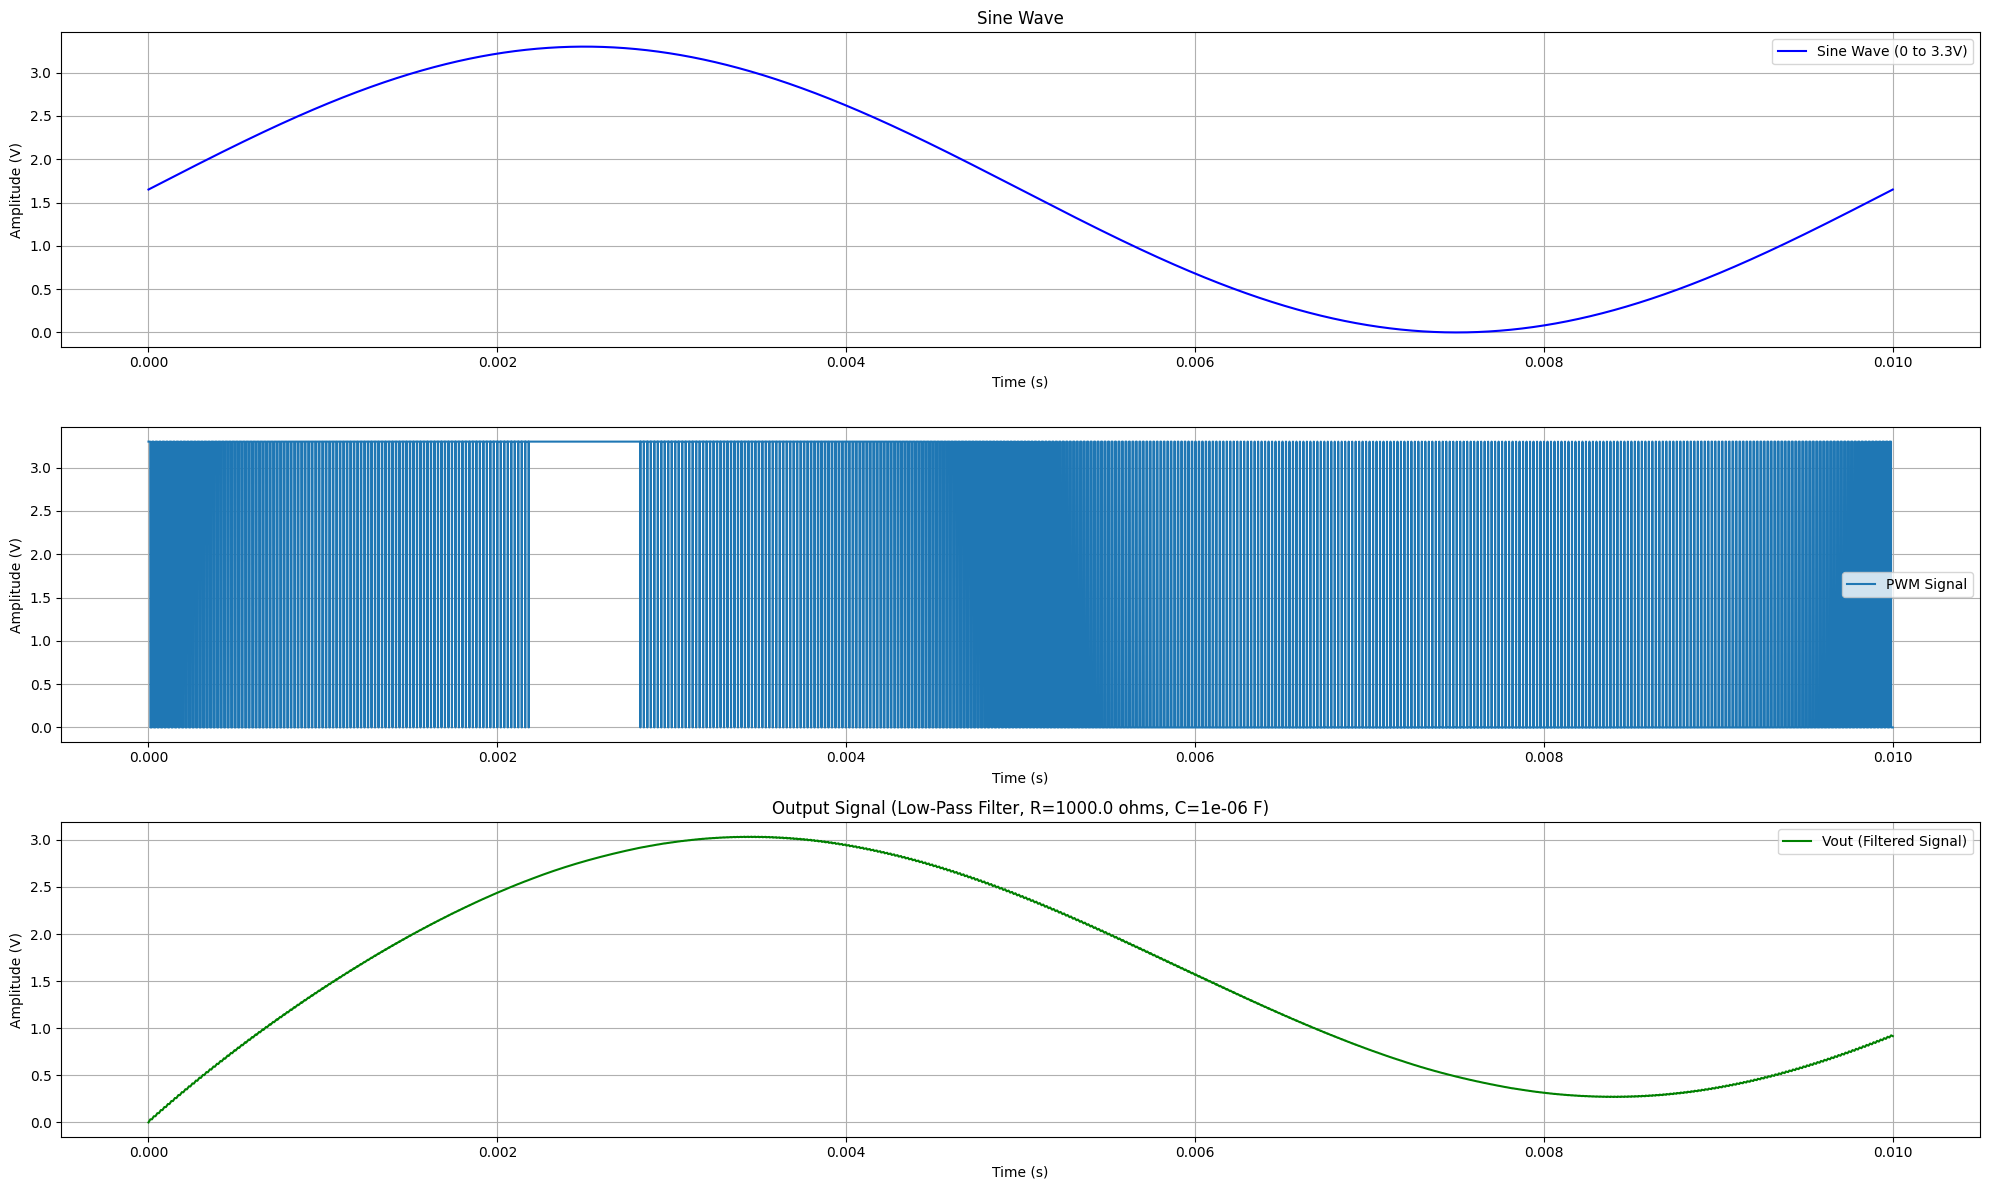

In [14]:
print(f"Valeur Tau du syst√®me: {tau}")
print(f"Fr√©quence de coupure: {fc:.2f}Hz")
print(f"Gain du circuit RC: -{gain:.2f}dB ou bien {(Vout_one_tick/source)*100:.2f}%")
print(f"D√©calage de phase: {phase_shift:.2f}rad ou bien {np.degrees(phase_shift):.2f}deg")
# Plotting the input (PWM) and output (filtered signal) on separate graphs
plot.figure(figsize=(20, 12))

# Plot PWM (Vin)
plot.subplot(3, 1, 2)
plot.plot(t, pwm_signal, label='PWM Signal')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
#plot.title(f'Input Signal (PWM, Duty={pwm_duty_cycle*100:.1f}%, Frequency={frequency}Hz)')
plt.grid()
plot.legend()

# Plot filtered output (Vout)
plot.subplot(3, 1, 3)
plot.plot(t, Vout, label='Vout (Filtered Signal)', color='g')
plot.xlabel('Time (s)')
plot.ylabel('Amplitude (V)')
plot.title(f'Output Signal (Low-Pass Filter, R={R} ohms, C={C} F)')
plt.grid()
plot.legend()

# Plot sine wave
plt.subplot(3, 1, 1)
plt.plot(t, sig, label='Sine Wave (0 to 3.3V)', color='blue')
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid()
plt.legend()

plot.tight_layout()
plot.show()